In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term




---



In [0]:
# Importing libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from os import listdir
import cv2

from google.colab.patches import cv2_imshow

In [0]:
def tratamento_imagem(img):
    # Resize
    x = 8
    dim = (int(2250 / x), int(4000 / x))
    resized = cv2.resize(img, dim)
    # Remover ruido
    img_noise = cv2.fastNlMeansDenoisingColored(resized, None, 17, 10, 7, 21)
    # Reconhecendo contornos
    edges = cv2.Canny(img_noise, 100, 200)
    return edges

In [0]:
img_tratada = []
defeito = []
for filename in tqdm(listdir("drive/My Drive/deep_learning/deep")):
    result = tratamento_imagem(cv2.imread("drive/My Drive/deep_learning/deep/" + filename))
    img_tratada.append(result)
    defeito.append(0)

for filename in tqdm(listdir("drive/My Drive/deep_learning/defeito")):
    result = tratamento_imagem(cv2.imread("drive/My Drive/deep_learning/defeito/" + filename))
    img_tratada.append(result)
    defeito.append(1)

100%|██████████| 62/62 [01:22<00:00,  1.43s/it]


In [0]:
# Reading the training images
train_image = []
for img in tqdm(img_tratada):
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

# Creating the target variable
y = defeito

100%|██████████| 125/125 [00:00<00:00, 3920.17it/s]


In [0]:
# Creating validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


# Camadas do deep learning




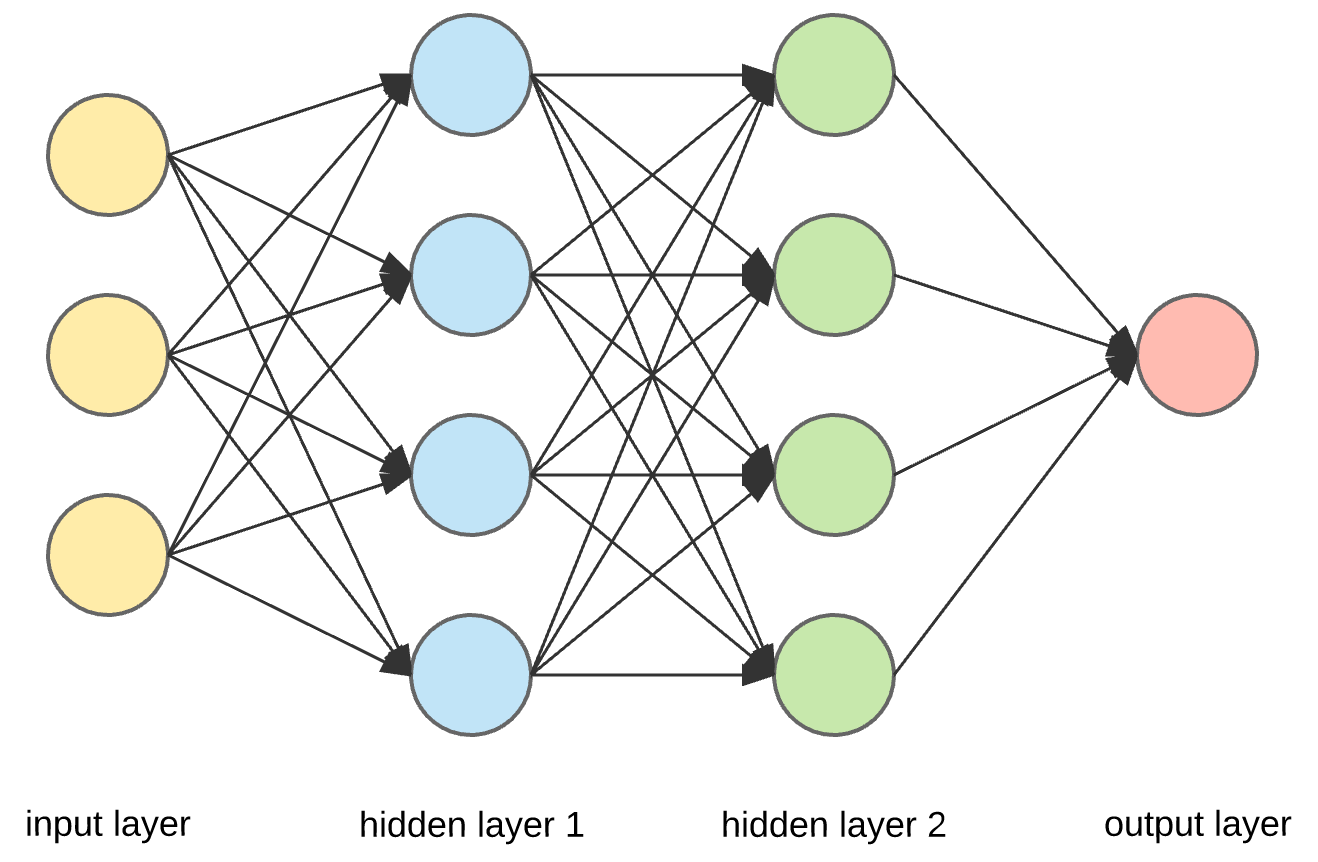

---


In [0]:
# Define the model structure
model = Sequential()

model.add(Conv2D(32, kernel_size=(10, 10),activation='relu',input_shape=(500,281,1)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [0]:
# Training the model
model.fit(X_train, y_train, batch_size=20, epochs=10, validation_data=(X_test, y_test))

Train on 100 samples, validate on 25 samples
Epoch 1/10
100/100 [==============================] - 25s 247ms/step - loss: 0.7536 - acc: 0.4200 - val_loss: 0.6979 - val_acc: 0.4000
Epoch 2/10
100/100 [==============================] - 24s 243ms/step - loss: 0.7098 - acc: 0.5100 - val_loss: 0.6989 - val_acc: 0.4000
Epoch 3/10
100/100 [==============================] - 24s 245ms/step - loss: 0.6958 - acc: 0.4800 - val_loss: 0.6998 - val_acc: 0.4000
Epoch 4/10
100/100 [==============================] - 25s 245ms/step - loss: 0.7128 - acc: 0.5000 - val_loss: 0.6982 - val_acc: 0.4000
Epoch 5/10
100/100 [==============================] - 25s 249ms/step - loss: 0.6953 - acc: 0.4600 - val_loss: 0.7030 - val_acc: 0.4000
Epoch 6/10
100/100 [==============================] - 25s 249ms/step - loss: 0.6989 - acc: 0.5000 - val_loss: 0.6961 - val_acc: 0.4000
Epoch 7/10
100/100 [==============================] - 25s 246ms/step - loss: 0.6932 - acc: 0.5400 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 8/10

Piece with failure: 


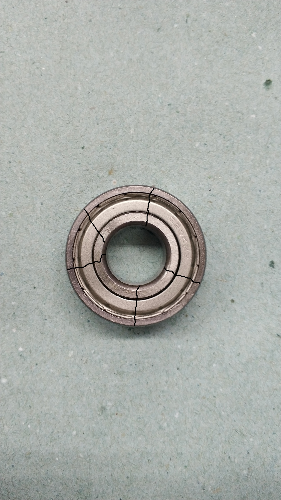

Classification: 1
Piece without failure: 


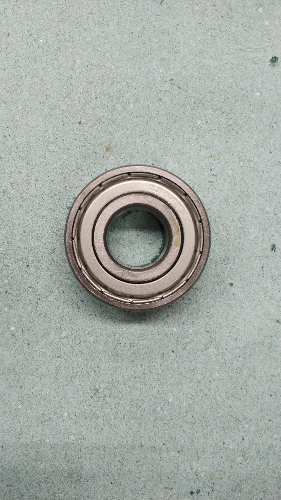

Classification: 1


In [0]:
ex_img = []
ex_img.append(cv2.imread("drive/My Drive/deep_learning/defeito/p09.jpg"))
ex_img.append(cv2.imread("drive/My Drive/deep_learning/deep/IMG_20191207_102404.jpg"))

tst_img = []

img = tratamento_imagem(ex_img[0])
img = image.img_to_array(img)
img = img/255
tst_img.append(img)
img = tratamento_imagem(ex_img[1])
img = image.img_to_array(img)
img = img/255
tst_img.append(img)

tst = np.array(tst_img)
result_tst = model.predict_classes(tst)

print("Piece with failure: ")
cv2_imshow(cv2.resize(ex_img[0], (int(2250 / 8), int(4000 / 8))))
print("Classification: " + str(result_tst[0][0]))

print("Piece without failure: ")
cv2_imshow(cv2.resize(ex_img[1], (int(2250 / 8), int(4000 / 8))))
print("Classification: " + str(result_tst[1][0]))

saida do resultado. acurácia. Um exemplo visual se um novo dado